# Harshi Shah

# C087

Experiment 6: Use feature descriptor to align images

Task 1: Use SIFT to determine interest points and descriptors for the given images

Task 2: Match key points of the images

Task 3: Generate Homography matrix using match key points

Task 4: Use Homography matrix to warp image to be aligned

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img2 = cv2.imread('/content/1.jpg')
import imutils
img1 = imutils.rotate(img2,10)

Text(0.5, 1.0, 'Reference Image')

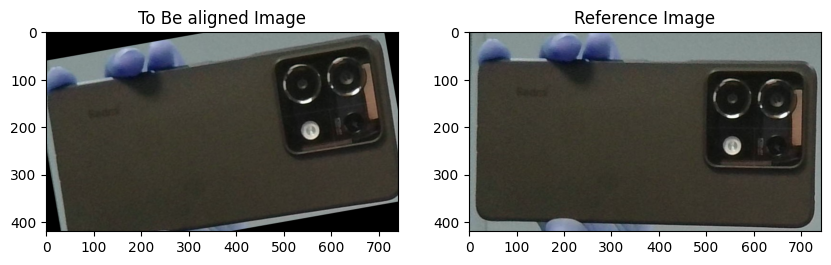

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title('To Be aligned Image')
plt.subplot(1,2,2)
plt.imshow(img2)
plt.title('Reference Image')

In [ ]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img1_g = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2_g = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

Text(0.5, 1.0, 'Reference Image')

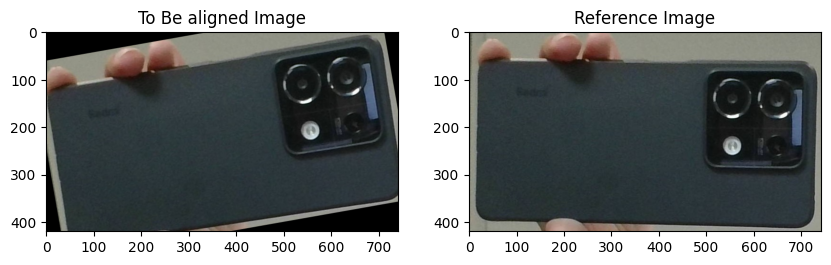

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title('To Be aligned Image')
plt.subplot(1,2,2)
plt.imshow(img2)
plt.title('Reference Image')

Text(0.5, 1.0, 'Reference Image-Gray')

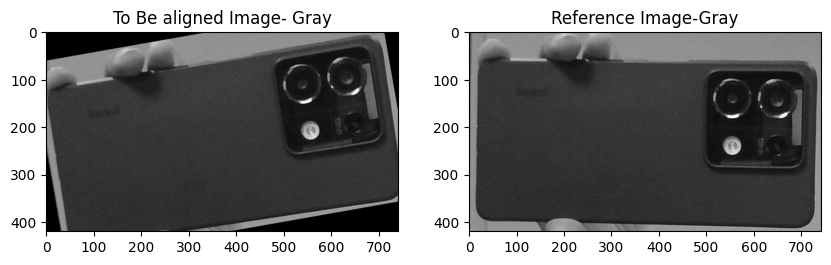

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img1_g,cmap='gray')
plt.title('To Be aligned Image- Gray')
plt.subplot(1,2,2)
plt.imshow(img2_g,cmap='gray')
plt.title('Reference Image-Gray')

In [ ]:
[rows,cols]= img1_g.shape

In [ ]:
orb = cv2.ORB_create(500)
k1,d1 = orb.detectAndCompute(img1_g,None)
k2,d2 = orb.detectAndCompute(img2_g,None)

In [ ]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = matcher.match(d1,d2)
matches = sorted(matches, key=lambda val:val.distance)


In [ ]:
top = int(len(matches)*0.9)
matches = matches[:top]
ln = len(matches)

In [ ]:
print(ln) # 450 matches

394


In [ ]:
matrix1 = np.zeros((ln,2))
matrix2 = np.zeros((ln,2))

In [ ]:
for i in range(ln):
  matrix1[i,:] = k1[matches[i].queryIdx].pt # matching to be aligned keypoints with refernce image keypoint to get keypoint location
  matrix2[i,:] = k2[matches[i].trainIdx].pt

In [ ]:
# homographic matrix is only for matching pairs

In [ ]:
h,m = cv2.findHomography(matrix1,matrix2,cv2.RANSAC) # ransac algo is locating outliers and remove them

In [ ]:
img_align = cv2.warpPerspective(img1,h,(cols,rows))

Text(0.5, 1.0, 'Aligned Image')

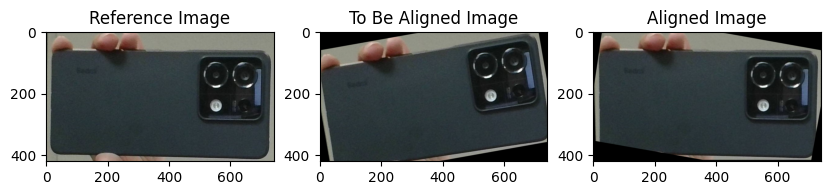

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(img2)
plt.title('Reference Image')
plt.subplot(1, 3, 2)
plt.imshow(img1)
plt.title('To Be Aligned Image')
plt.subplot(1, 3, 3)
plt.imshow(img_align)
plt.title('Aligned Image')


In [ ]:
h

array([[ 9.94550279e-01, -1.46328421e-01,  3.87867693e+01],
       [ 1.75907494e-01,  9.97014529e-01, -6.24803872e+01],
       [ 6.71579899e-06,  4.19730718e-05,  1.00000000e+00]])

Conclusion: For the given 2 images , orb detector is used to determine the location of keypoints and their corresponding descriptors. Brute Force matcher is used to match the corresponding match and matched points are used to find the homographic matrix. Homographic matrix is used to warp image. the results show that the image is aligned to the reference image. The same proces is repeated for Rotated image and result shows rotated image is also aligned to reference image. This process is applied to real time phone image mobile and result shows aligned image.